# **Le Dataset TITANIC**
_Tutorat programmation python par Cyprien et Alexandre_

In [1]:
# Importation des librairies d'intérêts
import pandas as pd
import seaborn as sns
import os

In [2]:
# Définition du chemin d'accès
path = os.getcwd()
dataset_folder = "datasets"
titanic_filename = "titanic.csv"

path_titanic_dataset = os.path.join(path, dataset_folder, titanic_filename)

In [3]:
# Importation du dataset
data = pd.read_csv(path_titanic_dataset, sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
# Vérification des cases vides
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
# On supprime les lignes comprenant des NA
data_drop = data.dropna(axis=0)
data_drop
# ??

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [6]:
# body, cabin, home.dest et boat seront retiré car il manque trop d'info et le name parce qu'elle est trop variable
data_clear = data.drop(columns=["body", "cabin", "home.dest", "boat", "name"])
data_clear.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [7]:
# nous allons retiré les deux passager dont la porte d'embarquation est manquante et celui dont le fare est manquant
to_drop_embarked = data_clear.loc[data_clear["embarked"].isnull()].index
to_drop_fare = data_clear.loc[data_clear["fare"].isnull()].index

data_cleared = data_clear.drop(to_drop_embarked)
data_cleared = data_cleared.drop(to_drop_fare)
data_cleared.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64

In [8]:
import numpy as np

In [9]:
# On remplace les valeures d'age manquante par une valeure moyenne
age_index = data_cleared.loc[data_cleared["age"].isnull()].index

for i in age_index:
    data_cleared["age"].loc[i] = np.random.normal(loc=data_cleared["age"].mean(),
                                                  scale=data_cleared["age"].std())

C:\Users\alexa\AppData\Local\Temp\ipykernel_125320\2798108217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleared["age"].loc[i] = np.random.normal(loc=data_cleared["age"].mean(),


In [10]:
data_cleared["age"] = data_cleared["age"].round(2)
data_cleared.isnull().sum()
# Tout est bon !

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

<Axes: xlabel='pclass', ylabel='age'>

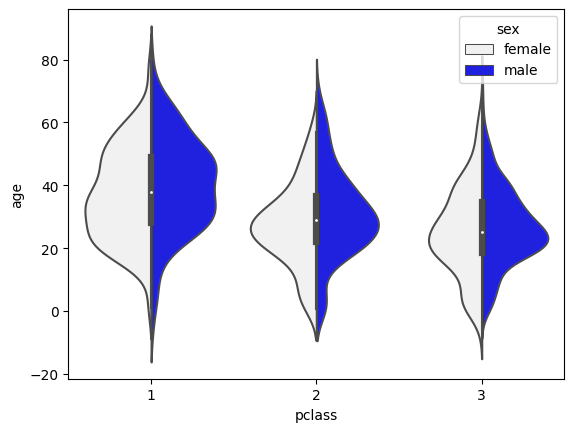

In [11]:
sns.violinplot(data=data_cleared, x="pclass", y="age", hue="sex", split=True, color="blue")